# Analyzing the Characteristics of Customer Segmentation Data Set through Cluster Analysis 

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

In [34]:
data = pd.read_csv('data.csv')
data.head()

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [35]:
data.describe()

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [36]:
import seaborn as sb

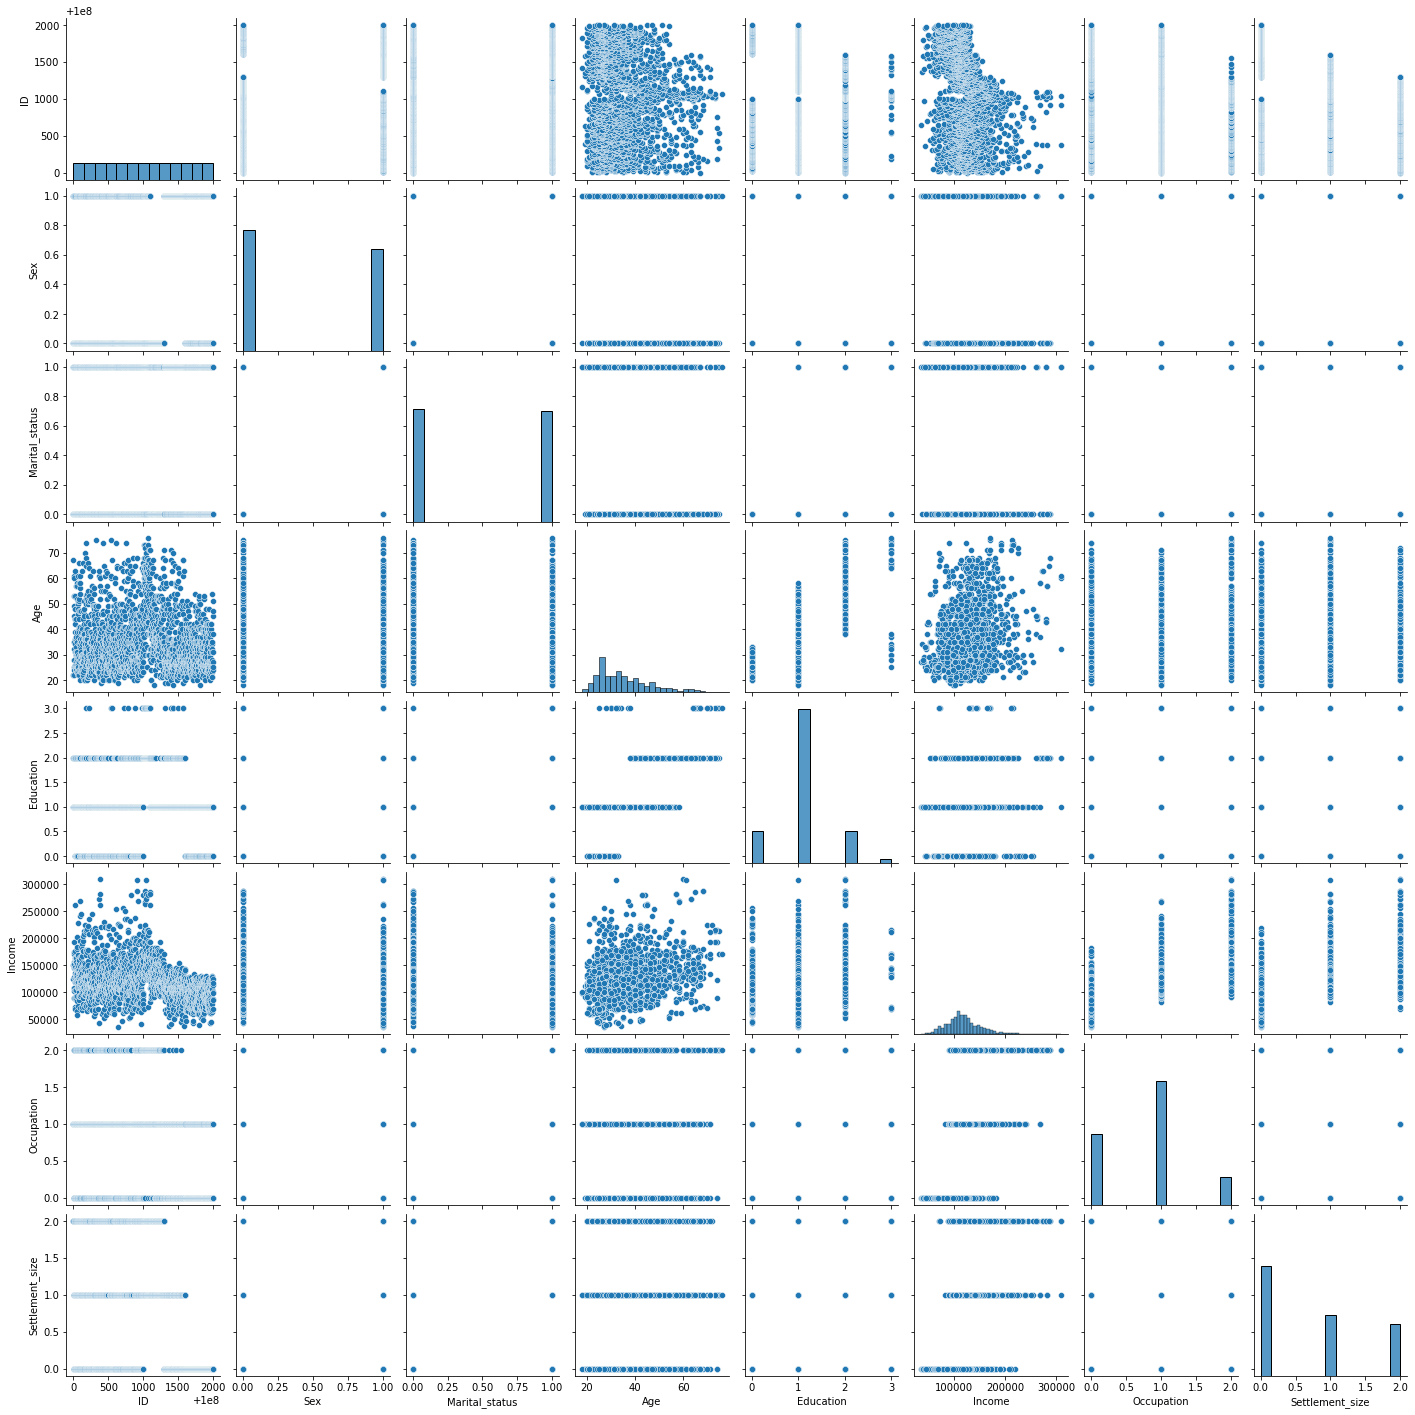

In [37]:
sb.pairplot(data)

In [38]:
km = KMeans(n_clusters=6)
km

KMeans(n_clusters=6)

In [39]:
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([3, 0, 1, ..., 5, 1, 5])

In [40]:
data['cluster'] = y_predicted
data

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size,cluster
0,100000001,0,0,67,2,124670,1,2,3
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,3
1996,100001997,1,1,27,1,117744,1,0,3
1997,100001998,0,0,31,0,86400,0,0,5
1998,100001999,1,1,24,1,97968,0,0,1


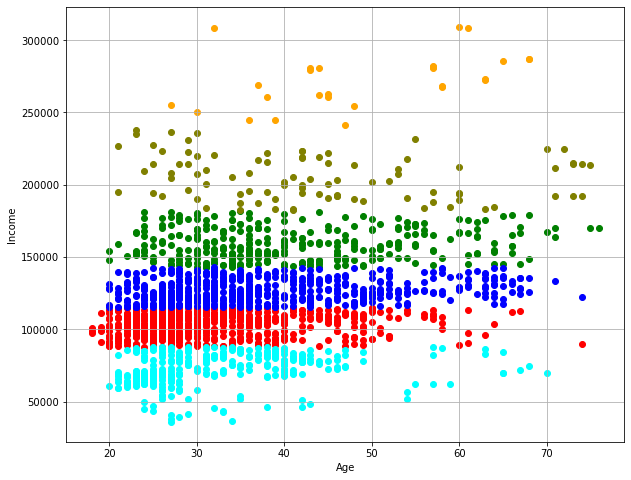

In [41]:
df1 = data[data.cluster ==0]
df2 = data[data.cluster ==1]
df3 = data[data.cluster ==2]
df4 = data[data.cluster ==3]
df5 = data[data.cluster ==4]
df6 = data[data.cluster ==5]

plt.figure(figsize=(10, 8))
plt.scatter(df1.Age,df1['Income'], color = 'green')
plt.scatter(df2.Age,df2['Income'], color = 'red')
plt.scatter(df3.Age,df3['Income'], color = 'orange')
plt.scatter(df4.Age,df4['Income'], color = 'blue')
plt.scatter(df5.Age,df5['Income'], color = 'olive')
plt.scatter(df6.Age,df6['Income'], color = 'cyan')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid()

In [42]:
scaler = MinMaxScaler()
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

In [43]:
data.head()

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size,cluster
0,100000001,0,0,0.844828,2,0.324781,1,2,3
1,100000002,1,1,0.068966,1,0.420210,1,2,0
2,100000003,0,0,0.534483,1,0.195144,0,0,1
3,100000004,0,0,0.465517,1,0.496223,1,1,0
4,100000005,0,0,0.603448,1,0.413842,1,1,0


In [44]:
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([4, 2, 0, ..., 5, 1, 1])

In [45]:
data['cluster'] = y_predicted

In [46]:
data.head()

,ID,Sex,Marital_status,Age,Education,Income,Occupation,Settlement_size,cluster
0,100000001,0,0,0.844828,2,0.324781,1,2,4
1,100000002,1,1,0.068966,1,0.420210,1,2,2
2,100000003,0,0,0.534483,1,0.195144,0,0,0
3,100000004,0,0,0.465517,1,0.496223,1,1,0
4,100000005,0,0,0.603448,1,0.413842,1,1,0


In [47]:
km.cluster_centers_

array([[0.50175151, 0.32783812],
       [0.12662272, 0.23063644],
       [0.23781213, 0.44565598],
       [0.50410509, 0.72625141],
       [0.76745424, 0.39694457],
       [0.30682923, 0.23876289]])

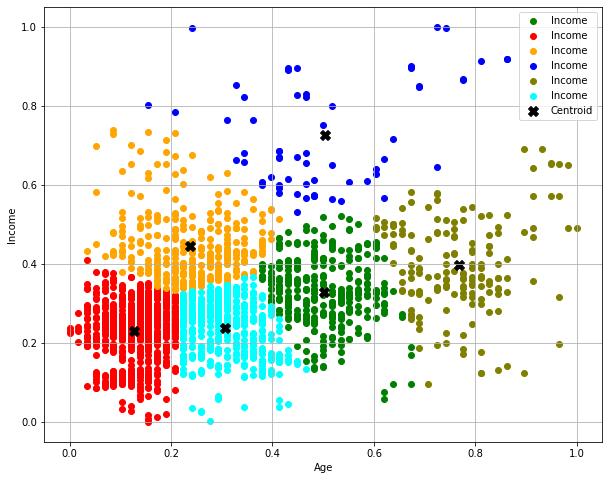

In [48]:
df1 = data[data.cluster ==0]
df2 = data[data.cluster ==1]
df3 = data[data.cluster ==2]
df4 = data[data.cluster ==3]
df5 = data[data.cluster ==4]
df6 = data[data.cluster ==5]

plt.figure(figsize=(10, 8))
plt.scatter(df1.Age,df1['Income'], color = 'green',label = 'Income')
plt.scatter(df2.Age,df2['Income'], color = 'red',label = 'Income')
plt.scatter(df3.Age,df3['Income'], color = 'orange',label = 'Income')
plt.scatter(df4.Age,df4['Income'], color = 'blue',label = 'Income')
plt.scatter(df5.Age,df5['Income'], color = 'olive',label = 'Income')
plt.scatter(df6.Age,df6['Income'], color = 'cyan',label = 'Income')
plt.grid()

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'black', marker='X', s=100, label = 'Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [49]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income']])
    sse.append(km.inertia_)

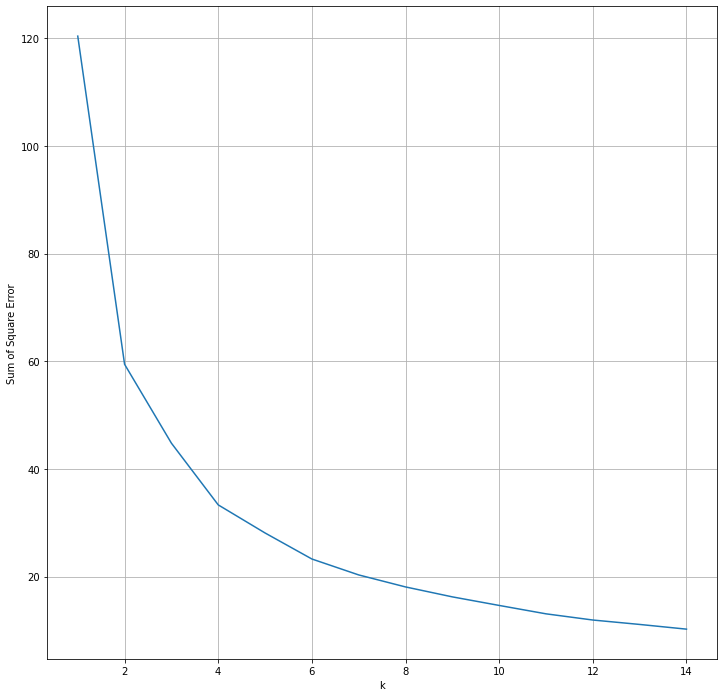

In [50]:
plt.figure(figsize=(12, 12))
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng, sse)
plt.grid(True)

In [51]:
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import seaborn as sb


In [52]:
np.set_printoptions(precision= 4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [53]:
x = data[['Age']].values
y = data[['Income']].values

In [54]:
z = linkage(x,'ward')

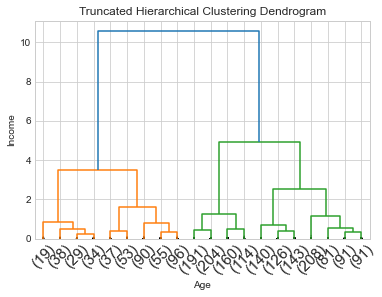

In [55]:
dendrogram(z, truncate_mode='lastp', p = 20, leaf_rotation=45., leaf_font_size=15.,show_contracted=True)

plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Age')
plt.ylabel('Income')
plt.axhline(y = 2000)
plt.axhline(y = 200)
plt.show()

---

## About This Task
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** 
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** 
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation**
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** 
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** 
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then save it as a PDF file which will be submitted. <hr style="width:35%;margin-left:0;"> 

2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers. Include comments.  